# Exploratory Data Analysis (EDA) for Telecom Dataset Notebook
## What this notebook does is:

- Load the data from postgresql database
- Perform basic statistics on the data

In [1]:
# Import necessary libraries
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory of the project
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# # Insert the path to the Scripts directory
# sys.path.insert(0, os.path.join(parent_dir, 'Scripts'))

# print(sys.path)

c:\Users\HP\Desktop\KAIM-Cohort-3\Week 2\TellCo-Telecom-Financial-Data-Analysis\notebooks
c:\Users\HP\Desktop\KAIM-Cohort-3\Week 2\TellCo-Telecom-Financial-Data-Analysis


In [3]:
# Import functions from modules
from scripts.database import connect_to_db, query_data
from scripts.analysis import get_engagement_metrics, normalize_metrics, cluster_users
from scripts.visualizations import univariate_analysis, bivariate_analysis

In [4]:
# Connect to the database
engine = connect_to_db()

Database connection successful!


In [5]:
# Get engagement metrics (session frequency, total duration, total traffic)
engagement_data = get_engagement_metrics(engine)
engagement_data.head(5)

Query executed successfully!


,msisdn,session_frequency,total_duration,total_traffic
0,3.366211e+10,1,14239.0,7.455855e+08
1,3.361542e+10,2,60414.0,9.984433e+08
2,NaN,504,72446396.0,5.312489e+11
3,3.376314e+10,4,306379.0,2.337195e+09
4,3.365845e+10,3,159255.0,1.980244e+09


In [6]:
# Normalize metrics (session frequency, total duration, total traffic)
normalized_data = normalize_metrics(engagement_data, ['session_frequency', 'total_duration', 'total_traffic'])
normalized_data.head(5)

,msisdn,session_frequency,total_duration,total_traffic,session_frequency_norm,total_duration_norm,total_traffic_norm
0,3.366211e+10,1,14239.0,7.455855e+08,0.001984,0.000098,0.001341
1,3.361542e+10,2,60414.0,9.984433e+08,0.003968,0.000735,0.001817
2,NaN,504,72446396.0,5.312489e+11,1.000000,1.000000,1.000000
3,3.376314e+10,4,306379.0,2.337195e+09,0.007937,0.004131,0.004337
4,3.365845e+10,3,159255.0,1.980244e+09,0.005952,0.002100,0.003665


In [7]:
#Perform clustering (K-means with 3 clusters)
clustered_data, kmeans_model = cluster_users(normalized_data, ['session_frequency_norm', 'total_duration_norm', 'total_traffic_norm'])
clustered_data.head(5)

,msisdn,session_frequency,total_duration,total_traffic,session_frequency_norm,total_duration_norm,total_traffic_norm,engagement_cluster
0,3.366211e+10,1,14239.0,7.455855e+08,0.001984,0.000098,0.001341,2
1,3.361542e+10,2,60414.0,9.984433e+08,0.003968,0.000735,0.001817,2
2,NaN,504,72446396.0,5.312489e+11,1.000000,1.000000,1.000000,1
3,3.376314e+10,4,306379.0,2.337195e+09,0.007937,0.004131,0.004337,0
4,3.365845e+10,3,159255.0,1.980244e+09,0.005952,0.002100,0.003665,0


In [8]:
# Analyze top handsets used by customers
top_handsets = query_data(engine, """
    SELECT "Handset Type", COUNT(*) AS count
    FROM public.xdr_data
    GROUP BY "Handset Type"
    ORDER BY count DESC
    LIMIT 10;
""")
top_handsets.head(5)

Query executed successfully!


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326


In [9]:
# Analyze top handset manufacturers
top_manufacturers = query_data(engine, """
    SELECT "Handset Manufacturer", "Handset Type", COUNT(*) AS count
    FROM public.xdr_data
    GROUP BY "Handset Manufacturer", "Handset Type"
    ORDER BY "Handset Manufacturer", count DESC
    LIMIT 15;
""")
top_manufacturers.head(5)

Query executed successfully!


,Handset Manufacturer,Handset Type,count
0,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 Plus,2
1,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot A5,1
2,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Power,1
3,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot Note S,1
4,A-Link Telecom International Co Limited,A-Link Telecom I. Cubot R9,1


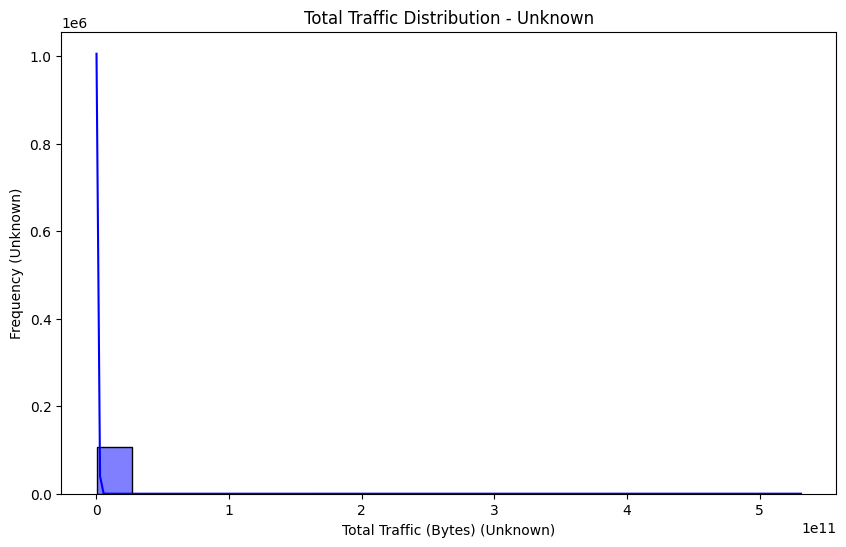

c:\Users\HP\Desktop\KAIM-Cohort-3\Week 2\TellCo-Telecom-Financial-Data-Analysis\scripts\visualizations.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='deep')


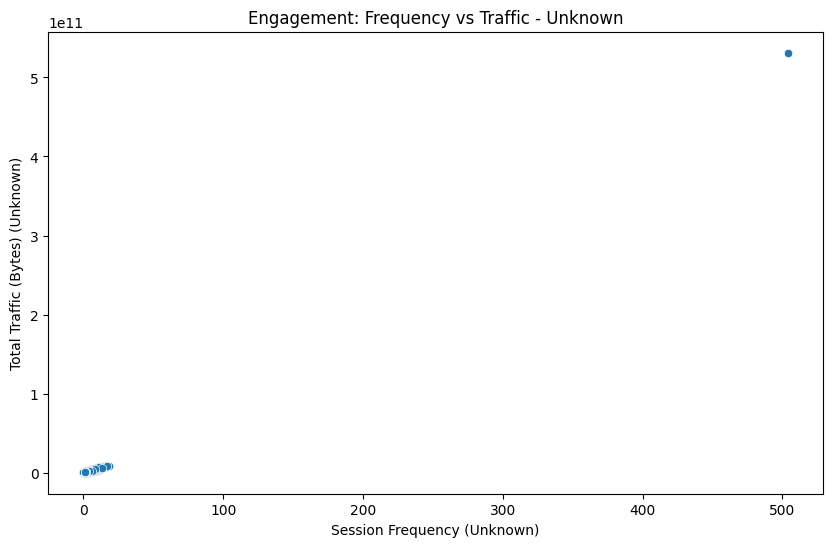

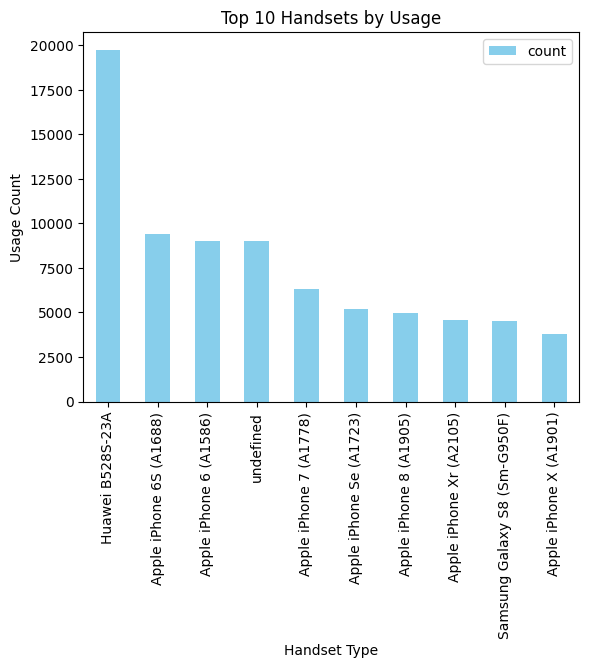

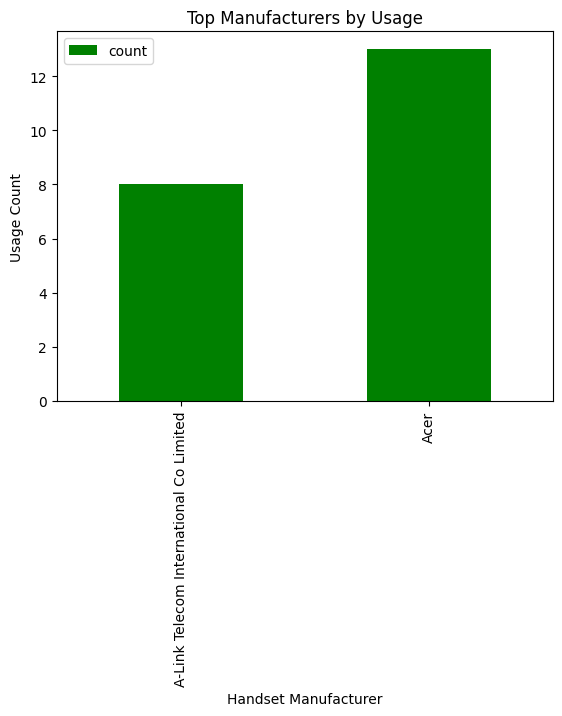

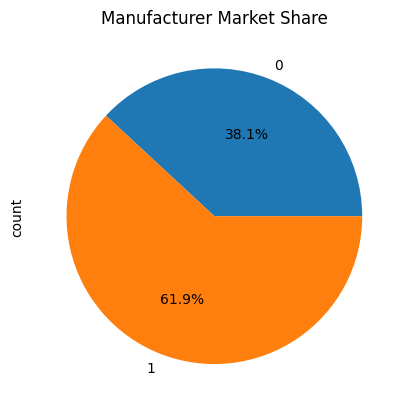

In [10]:

# Visualizations
## Univariate Analysis - Total Traffic Distribution
univariate_analysis(clustered_data, 'total_traffic', plot_type="hist", title="Total Traffic Distribution", xlabel="Total Traffic (Bytes)", ylabel="Frequency")

## Bivariate Analysis - Engagement: Frequency vs Traffic
bivariate_analysis(clustered_data, 'session_frequency', 'total_traffic', kind="scatter", title="Engagement: Frequency vs Traffic", xlabel="Session Frequency", ylabel="Total Traffic (Bytes)")

## Visualizing Top Handsets
top_handsets.plot(kind='bar', x='Handset Type', y='count', color='skyblue', title="Top 10 Handsets by Usage")
plt.xlabel("Handset Type")
plt.ylabel("Usage Count")
plt.show()

## Visualizing Top Manufacturers
top_manufacturers_grouped = top_manufacturers.groupby("Handset Manufacturer")["count"].sum().reset_index()
top_manufacturers_grouped.plot(kind='bar', x='Handset Manufacturer', y='count', color='green', title="Top Manufacturers by Usage")
plt.xlabel("Handset Manufacturer")
plt.ylabel("Usage Count")
plt.show()

## Visualizing Manufacturer Market Share
manufacturer_share = top_manufacturers.groupby("Handset Manufacturer")["count"].sum().reset_index()
manufacturer_share.plot(kind='pie', x='Handset Manufacturer', y='count', autopct='%1.1f%%', title="Manufacturer Market Share", legend=False)
plt.show()